In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import parquet
import numpy as np
import folium
from folium.plugins import MarkerCluster
from folium.plugins import HeatMap

%load_ext autoreload
%autoreload 2
import utils

import warnings
warnings.filterwarnings("ignore")

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


Se lee el Dataset que se creo anteriormente y se guarda en un dataframe para facilitar su uso.

In [14]:
df_siniestros_final = pd.read_parquet('../Datasets_limpios/siniestrosfinal.parquet')
df_siniestros_final.head()

,id_feu,hora,zona,tipo_via,latitud,longitud,ilesos,heridos,fallecidos,peatones,...,condiciones_climaticas,semaforo,anio,mes,dia,cruce,lugar_del_hecho,es_colision,tipo_siniestro_para_grafico,vehiculo
0,49056,20:10:00,Urbana,Avenida,-27.48105,-58.80054,1.0,2.0,0.0,0.0,...,Despejado,Funciona,2018,10,29,SI,AV INDEPENDENCIA y LAS PIEDRAS,Real,Colisión entre vehículos,"Motocicleta, Motocicleta, Automóvil"
1,49059,19:30:00,Urbana,Calle,-27.48406,-58.77596,1.0,1.0,0.0,0.0,...,Nublado,Sin Semáforo,2018,10,31,SI,BELASCOAIN y VIUDES,Real,Colisión entre vehículos,"Motocicleta, Automóvil"
2,48998,13:10:00,Urbana,Calle,-27.47203,-58.83722,1.0,1.0,0.0,0.0,...,Despejado,Sin Semáforo,2018,10,8,SI,BELGRANO y SAN JUAN,Real,Colisión entre vehículos,"Automóvil, Motocicleta"
3,49069,07:15:00,Urbana,Avenida,-27.47631,-58.83009,2.0,1.0,0.0,0.0,...,Despejado,Funciona,2018,11,5,SI,AVENIDA FERRE y ESPAÑA,Real,Colisión entre vehículos,"Automóvil, Motocicleta, Motocicleta"
4,48869,10:30:00,Urbana,Calle,-27.46437,-58.83526,1.0,1.0,0.0,0.0,...,Despejado,Sin Semáforo,2018,8,25,SI,MENDOZA y 25 DE mayo,Real,Colisión entre vehículos,"Automóvil, Automóvil"


Vamos a repasar un poco los datos que tenemos

In [15]:
utils.verificar_tipo_datos(df_siniestros_final)

,nombre_campo,tipo_datos,no_nulos_%,nulos_%,nulos
0,id_feu,[<class 'int'>],100.0,0.0,0
1,hora,[<class 'datetime.time'>],100.0,0.0,0
2,zona,[<class 'str'>],100.0,0.0,0
3,tipo_via,[<class 'str'>],100.0,0.0,0
4,latitud,[<class 'float'>],100.0,0.0,0
5,longitud,[<class 'float'>],100.0,0.0,0
6,ilesos,[<class 'float'>],100.0,0.0,0
7,heridos,[<class 'float'>],100.0,0.0,0
8,fallecidos,[<class 'float'>],100.0,0.0,0
9,peatones,[<class 'float'>],100.0,0.0,0


* Datos Generales

El  conjunto de datos presenta 24 variables (columnas) y 3563 registros lo que se pueden ver a continuación.

In [16]:
df_siniestros_final.shape[0]

3563

Comenzamos a graficar

<Figure size 1500x1000 with 0 Axes>

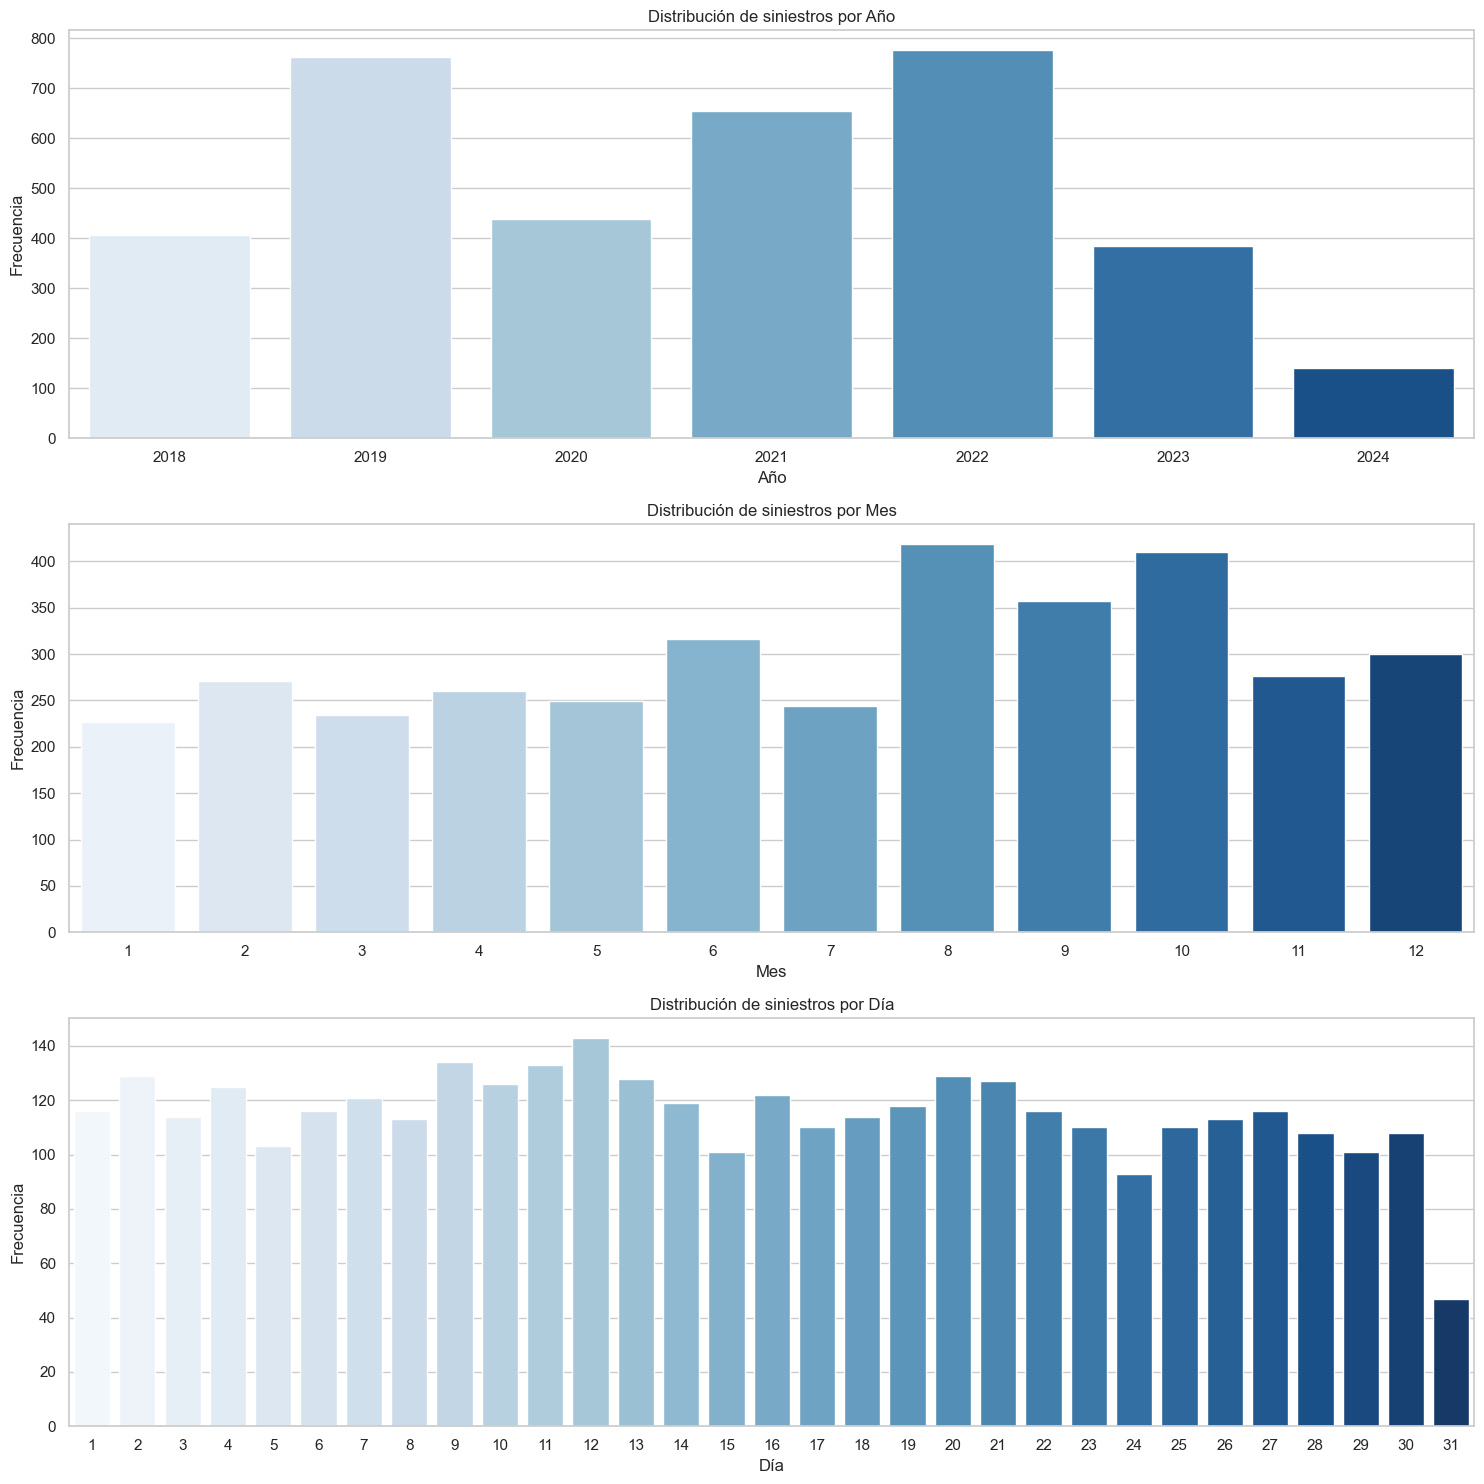

In [17]:
# Configuración de estilo para los gráficos
sns.set(style="whitegrid")
plt.figure(figsize=(15, 10))

# Crear la figura con subplots
fig, axes = plt.subplots(3, 1, figsize=(15, 15))

# 1. Frecuencia de siniestros por año
sns.countplot(ax=axes[0], data=df_siniestros_final, x='anio', palette='Blues')
axes[0].set_title('Distribución de siniestros por Año')
axes[0].set_xlabel('Año')
axes[0].set_ylabel('Frecuencia')

# 2. Frecuencia de siniestros por mes
sns.countplot(ax=axes[1], data=df_siniestros_final, x='mes', palette='Blues')
axes[1].set_title('Distribución de siniestros por Mes')
axes[1].set_xlabel('Mes')
axes[1].set_ylabel('Frecuencia')

# 3. Frecuencia de siniestros por día
sns.countplot(ax=axes[2], data=df_siniestros_final, x='dia', palette='Blues')
axes[2].set_title('Distribución de siniestros por Día')
axes[2].set_xlabel('Día')
axes[2].set_ylabel('Frecuencia')

# Ajustar el diseño
plt.tight_layout()

# Mostrar los gráficos
plt.show()

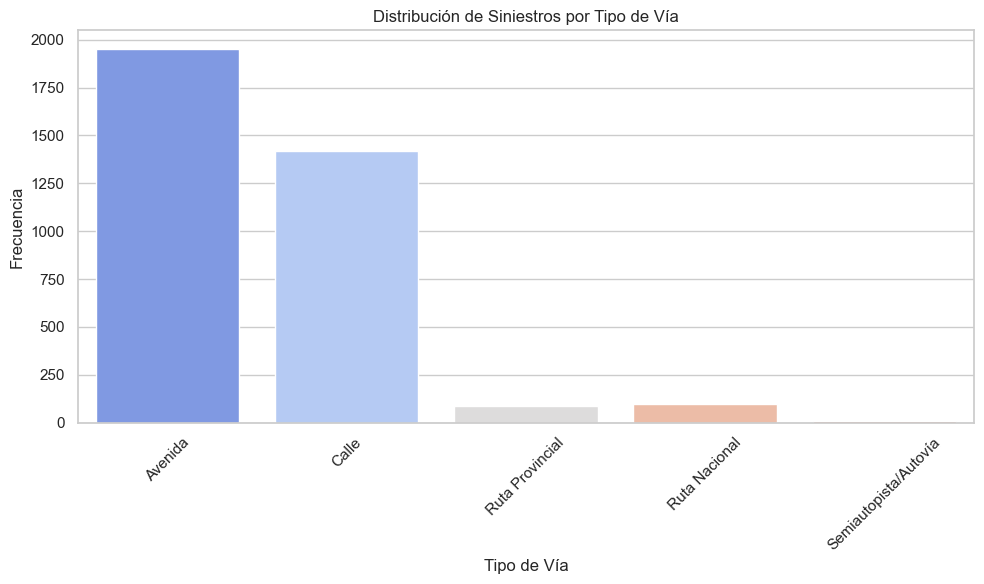

In [18]:
plt.figure(figsize=(10,6))
sns.countplot(data=df_siniestros_final, x='tipo_via', palette='coolwarm')
plt.title('Distribución de Siniestros por Tipo de Vía')
plt.xlabel('Tipo de Vía')
plt.ylabel('Frecuencia')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


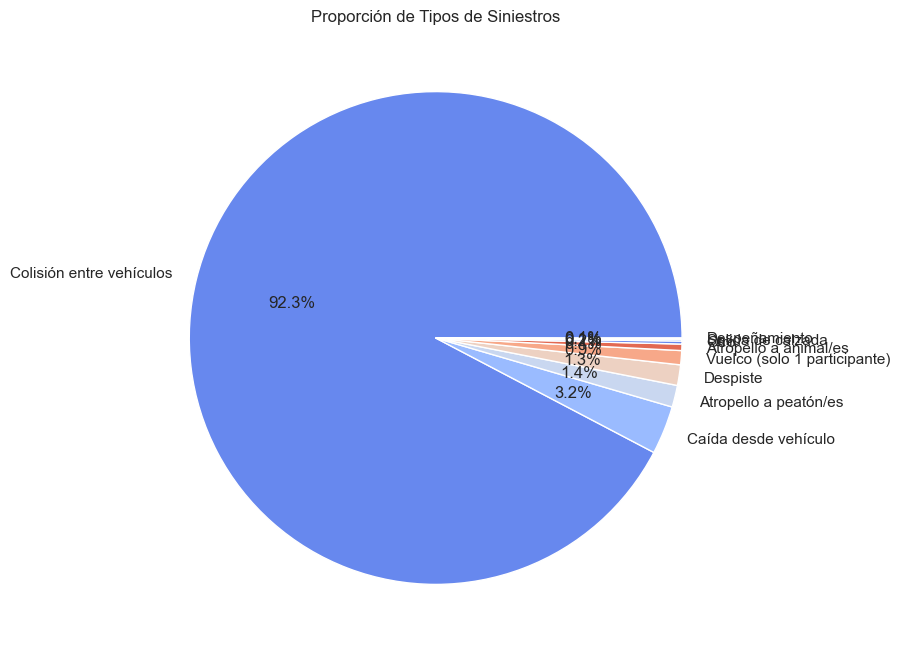

In [19]:
plt.figure(figsize=(8,8))
df_siniestros_final['tipo_siniestro'].value_counts().plot.pie(autopct='%1.1f%%', colors=sns.color_palette('coolwarm', n_colors=6))
plt.title('Proporción de Tipos de Siniestros')
plt.ylabel('')
plt.show()


In [20]:
# Crear mapa base
m = folium.Map(location=[-27.480, -58.830], zoom_start=13)

# Crear mapa de calor
heat_data = [[row['latitud'], row['longitud']] for index, row in df_siniestros_final.iterrows()]
HeatMap(heat_data).add_to(m)

# Guardar en archivo HTML
m.save('heatmap_siniestros.html')


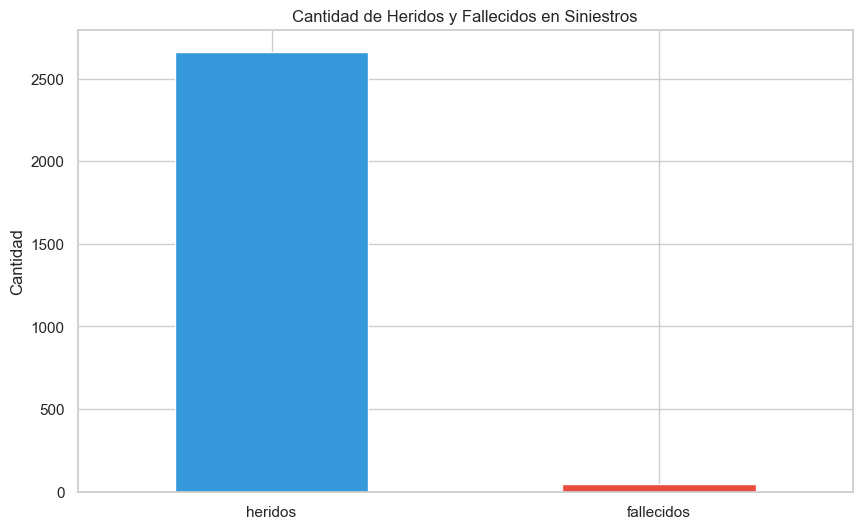

In [21]:
plt.figure(figsize=(10,6))
df_siniestros_final[['heridos', 'fallecidos']].sum().plot(kind='bar', color=['#3498db', '#e74c3c'])
plt.title('Cantidad de Heridos y Fallecidos en Siniestros')
plt.ylabel('Cantidad')
plt.xticks(rotation=0)
plt.show()


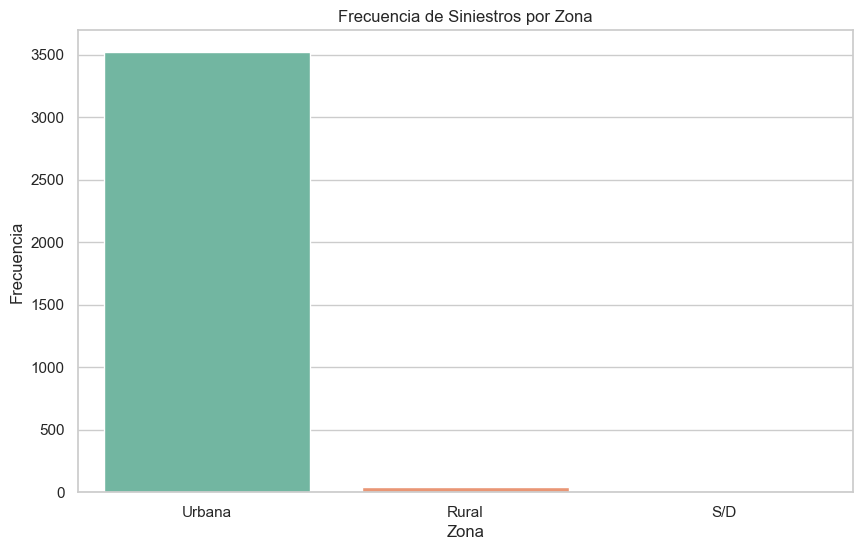

In [22]:
plt.figure(figsize=(10,6))
sns.countplot(data=df_siniestros_final, x='zona', palette='Set2')
plt.title('Frecuencia de Siniestros por Zona')
plt.xlabel('Zona')
plt.ylabel('Frecuencia')
plt.show()


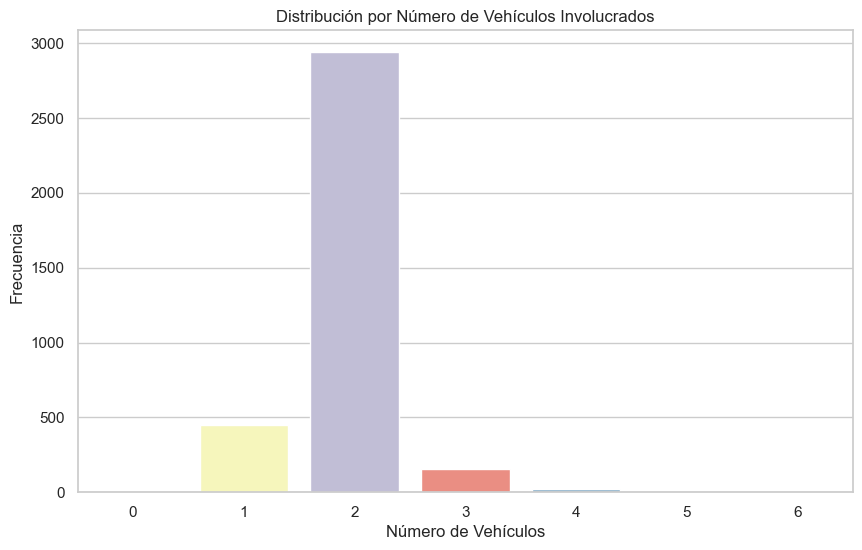

In [23]:
plt.figure(figsize=(10,6))
sns.countplot(data=df_siniestros_final, x='vehiculos_involucrados', palette='Set3')
plt.title('Distribución por Número de Vehículos Involucrados')
plt.xlabel('Número de Vehículos')
plt.ylabel('Frecuencia')
plt.show()


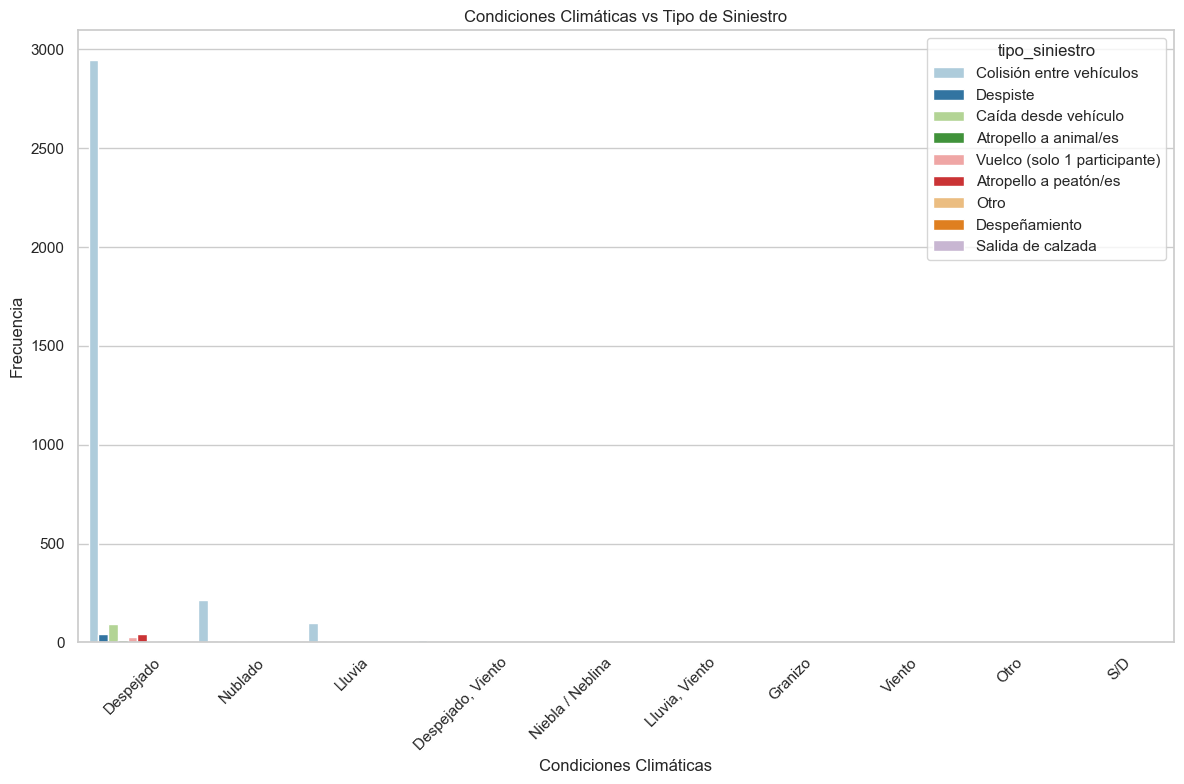

In [24]:
plt.figure(figsize=(12,8))
sns.countplot(data=df_siniestros_final, x='condiciones_climaticas', hue='tipo_siniestro', palette='Paired')
plt.title('Condiciones Climáticas vs Tipo de Siniestro')
plt.xlabel('Condiciones Climáticas')
plt.ylabel('Frecuencia')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


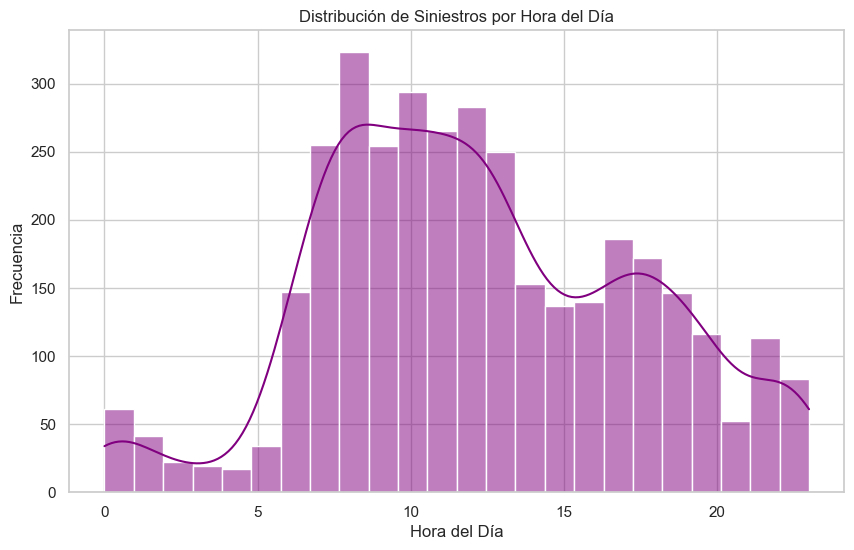

In [25]:
# Convertir 'hora' a formato datetime
df_siniestros_final['hora'] = pd.to_datetime(df_siniestros_final['hora'], format='%H:%M:%S').dt.hour

plt.figure(figsize=(10,6))
sns.histplot(df_siniestros_final['hora'], bins=24, color='purple', kde=True)
plt.title('Distribución de Siniestros por Hora del Día')
plt.xlabel('Hora del Día')
plt.ylabel('Frecuencia')
plt.show()


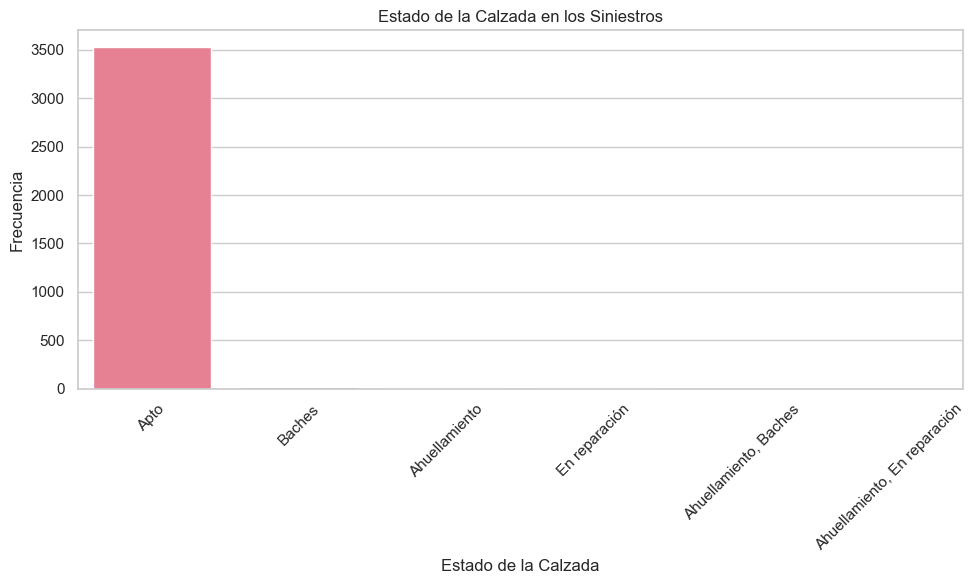

In [26]:
plt.figure(figsize=(10,6))
sns.countplot(data=df_siniestros_final, x='estado_de_la_calzada', palette='husl')
plt.title('Estado de la Calzada en los Siniestros')
plt.xlabel('Estado de la Calzada')
plt.ylabel('Frecuencia')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


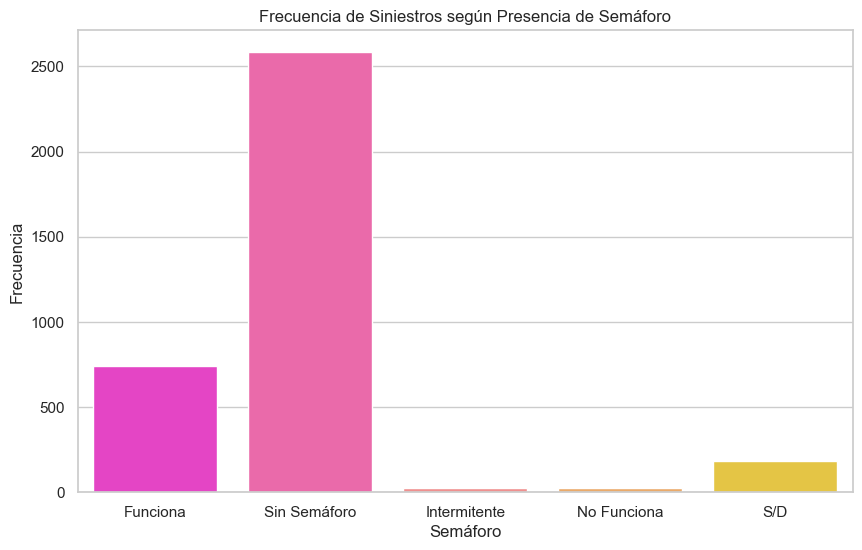

In [27]:
plt.figure(figsize=(10,6))
sns.countplot(data=df_siniestros_final, x='semaforo', palette='spring')
plt.title('Frecuencia de Siniestros según Presencia de Semáforo')
plt.xlabel('Semáforo')
plt.ylabel('Frecuencia')
plt.show()


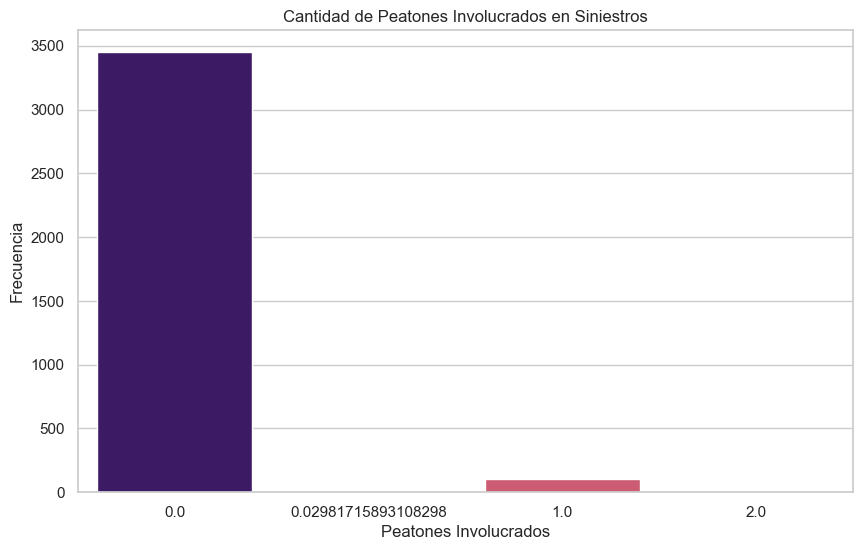

In [28]:
plt.figure(figsize=(10,6))
sns.countplot(data=df_siniestros_final, x='peatones', palette='magma')
plt.title('Cantidad de Peatones Involucrados en Siniestros')
plt.xlabel('Peatones Involucrados')
plt.ylabel('Frecuencia')
plt.show()


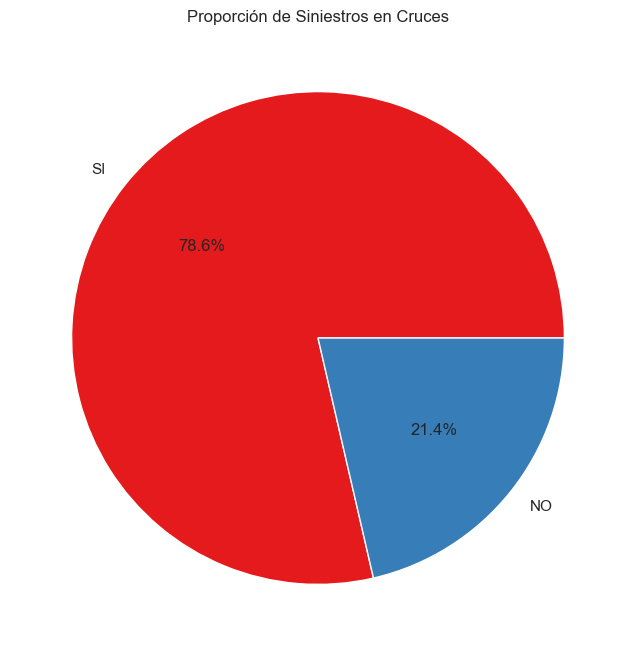

In [29]:
plt.figure(figsize=(8,8))
df_siniestros_final['cruce'].value_counts().plot.pie(autopct='%1.1f%%', colors=sns.color_palette('Set1'))
plt.title('Proporción de Siniestros en Cruces')
plt.ylabel('')
plt.show()